# Pymaceuticals Inc.
---

## Pymaceuticals Capomulin effects on Squamous Cell Carcinoma progression

Pymaceuticals, a company focused on developing anti-cancer drugs, recently started testing for treatments of squamous cell carcinoma (SCC), a common type of skin cancer.
In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Both Capomulin and Ramicane seem to have similar effectiveness, as shown by their average final tumor volumes. Tumor volumes for both treatments dropped significantly. 

The study employed a balanced distribution of male and female mice, with 49.4% of the mice being female and 50.6% being male.

While the sex of the mice didn't seem to play a huge roll in the outcome, the weight of the mouse seemed to have a great impact on the treatment results. The correlation between mouse weight and the average tumor volume is 0.84.

Overall, based on this set of data, it appears that Capomulin would be an effective treatment for Squamous Cell Carcinoma.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(number_of_mice)

249


In [33]:
duplicate_row_s = combined_data.duplicated(subset=['Mouse ID', 'Timepoint', 'Drug Regimen'], keep=False)
duplicate_row_s

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [34]:
duplicate_row_df = combined_data[duplicate_row_s]
duplicate_row_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
duplicate_mouse_IDs = duplicate_row_df['Mouse ID'].unique()
duplicate_mouse_IDs

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_all_data_s = combined_data["Mouse ID"].isin(duplicate_mouse_IDs)
combined_data[duplicate_mouse_all_data_s]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data[~duplicate_mouse_all_data_s]
#display
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_data_df['Mouse ID'].nunique()
#display
number_of_mice

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create inital summary table with Drug Regimes and counts
summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summarystats["Tumor_Vol_Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Tumor_Vol_Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Tumor_Vol_Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Tumor_Vol_Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["Tumor_Vol_SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns
summarystats = summarystats[["Tumor_Vol_Mean", "Tumor_Vol_Median", "Tumor_Vol_Standard Deviation", "Tumor_Vol_Variance", "Tumor_Vol_SEM"]]

#display
summarystats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Standard Deviation,Tumor_Vol_Variance,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

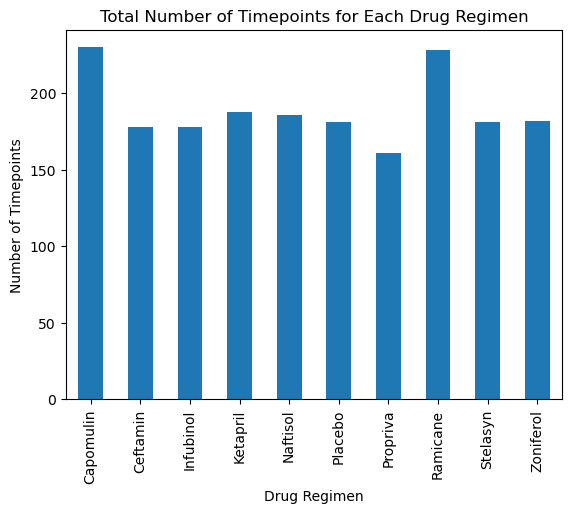

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Use groupby and count to calculate the total number of timepoints for each drug regimen
timepoints = combined_data.groupby("Drug Regimen").count()["Timepoint"]

# Create a bar plot of the timepoints using Pandas
timepoints.plot(kind="bar")

# Add labels and title to the plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")

# Show the plot
plt.show()


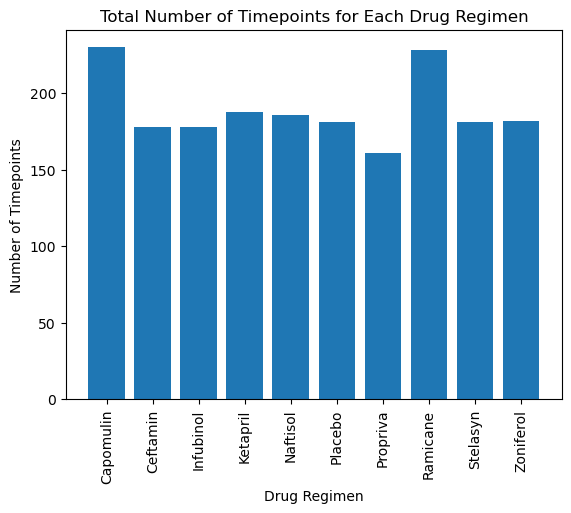

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Use groupby and count to calculate the total number of timepoints for each drug regimen
timepoints = combined_data.groupby("Drug Regimen").count()["Timepoint"]

# Create a bar plot of the timepoints using pyplot
plt.bar(timepoints.index, timepoints.values)

# Add labels and title to the plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

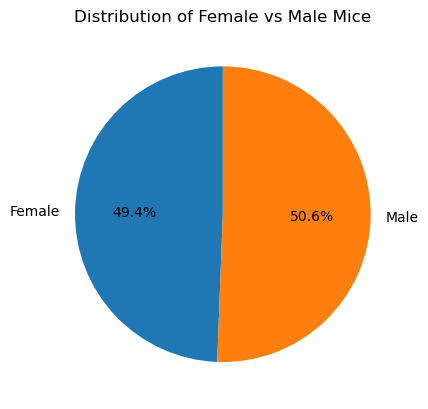

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Use groupby and count to calculate the number of female and male mice
gender_count = combined_data.groupby("Sex").count()["Mouse ID"]

# Create a pie plot of the gender count using Pandas
gender_count.plot.pie(autopct='%1.1f%%', startangle=90, shadow=False)

# Add labels and title to the plot
plt.ylabel("")
plt.title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()

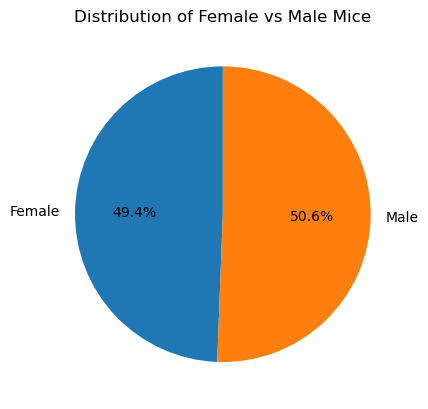

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Use groupby and count to calculate the number of female and male mice
gender_count = combined_data.groupby("Sex").count()["Mouse ID"]

# Create a pie plot of the gender count using pyplot
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)

# Add title to the plot
plt.title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Select only the rows corresponding to the four treatment regimens of interest
regimen_data = combined_data[combined_data["Drug Regimen"].isin(regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = regimen_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge the last_timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, combined_data, on=["Mouse ID", "Timepoint"])

# Group the data by Mouse ID and Drug Regimen and get the "Tumor Volume (mm3)" column
final_tumor_volumes = combined_data.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last().reset_index()

# Print the final tumor volumes DataFrame
final_tumor_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686
...,...,...,...
244,z435,Propriva,48.710661
245,z578,Ramicane,30.638696
246,z581,Infubinol,62.754451
247,z795,Naftisol,65.741070


In [45]:
matching_drug_row_s = final_tumor_volumes["Drug Regimen"] == drug
final_tumor_volumes[matching_drug_row_s]["Tumor Volume (mm3)"] 
final_tumor_volumes.loc[matching_drug_row_s, "Tumor Volume (mm3)"]


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

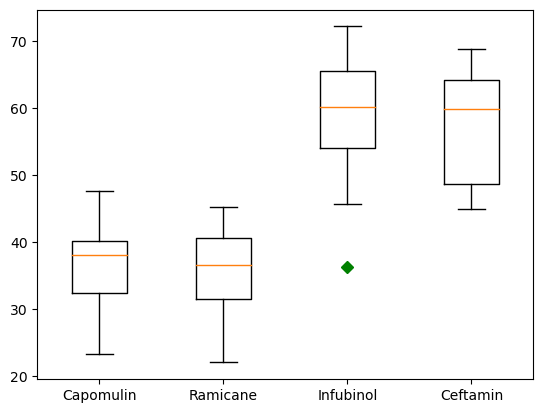

In [48]:
promising_boxplot_data = []
for drug in regimens: 
    matching_drug_row_s = final_tumor_volumes["Drug Regimen"] == drug
    drug_results = final_tumor_volumes[matching_drug_row_s]["Tumor Volume (mm3)"]
    promising_boxplot_data.append(drug_results)
    
#plt.boxplot(promising_boxplot_data, labels=regimens )
for i, drug in enumerate(regimens):
    matching_drug_row_s = final_tumor_volumes["Drug Regimen"] == drug
    drug_results = final_tumor_volumes[matching_drug_row_s]["Tumor Volume (mm3)"].tolist()    

plt.boxplot(promising_boxplot_data, labels=regimens, sym='gD')
plt.show()


## Line and Scatter Plots

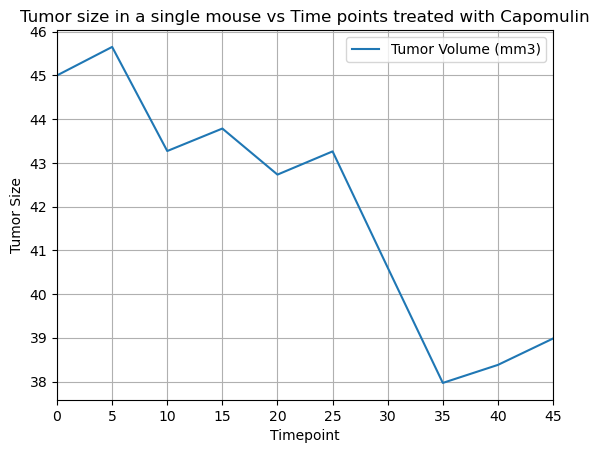

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = 'b128'
capomulin_treated=combined_data.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])
mouse_id=capomulin_treated.iloc[0,0]
capomulin_mouse_df=capomulin_treated.loc[capomulin_treated.iloc[:,0]==mouse_id,:]
x_axis=capomulin_mouse_df.iloc[:,1]
tvol=capomulin_mouse_df.iloc[:,2]
capomulin_mouse_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.xlim(0,45)
plt.grid()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.title('Tumor size in a single mouse vs Time points treated with Capomulin')
plt.show()

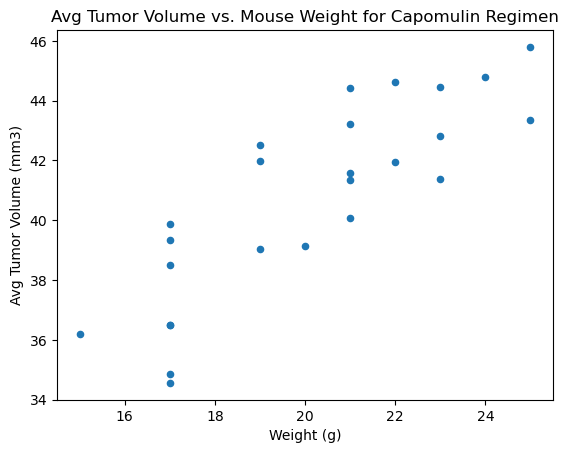

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
scatter_data = pd.DataFrame({'Mouse ID': avg_tumor_volume.index, 'Avg Tumor Volume': avg_tumor_volume.values, 'Weight': capomulin_data.groupby('Mouse ID')['Weight (g)'].first()})
scatter_data.plot(x='Weight', y='Avg Tumor Volume', kind='scatter')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Avg Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


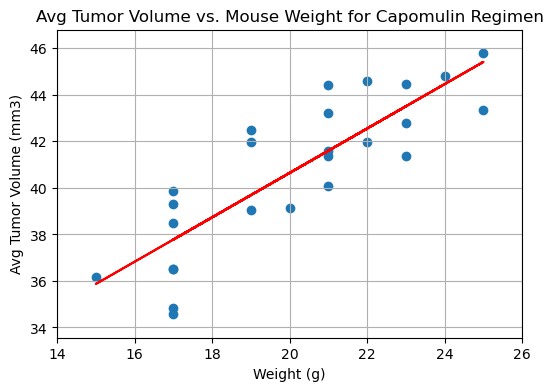

In [63]:
from scipy.stats import pearsonr, linregress
import scipy.stats as st

slope, intercept, r_value, p_value, std_err = linregress(scatter_data['Weight'], scatter_data['Avg Tumor Volume'])
line = f'y = {slope}x + {intercept}'

plt.subplots(figsize=(6,4))
plt.scatter(scatter_data['Weight'], scatter_data['Avg Tumor Volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Avg Tumor Volume vs. Mouse Weight for Capomulin Regimen')

intercept = round(intercept, 5)
slope = round(slope, 5)
line = f'y = {slope} x + {intercept}'
corr=st.pearsonr(scatter_data['Weight'],scatter_data['Avg Tumor Volume'])[0]

plt.plot(scatter_data['Weight'], intercept + slope*scatter_data['Weight'], '-', color='red')
plt.annotate(line, xy=(36, 22), fontsize=16, color='red')

plt.xlim(scatter_data['Weight'].min()-1, (scatter_data['Weight'].max()+1))
plt.ylim(scatter_data['Avg Tumor Volume'].min()-1, (scatter_data['Avg Tumor Volume'].max()+1))

plt.grid()

#display
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
plt.show()